In [1]:
# imports all my libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#load the datasets

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
links = pd.read_csv("links.csv")
tags = pd.read_csv("tags.csv")




In [3]:
# Inspecting the dataframe
print(f"Movieshape: {movies.shape}")
movies.head()





Movieshape: (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(f"RatingsShape: {ratings.shape}")
movies.head(6)

RatingsShape: (100836, 4)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [5]:
#show structure and data type
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
#check for missing values
movies.isna().sum()
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')


In [8]:
duplicates = ratings_movies[ratings_movies.duplicated()]


In [9]:
print (duplicates)


Empty DataFrame
Columns: [userId, movieId, rating, timestamp, title, genres]
Index: []


In [10]:
if np.issubdtype(ratings_movies['timestamp'].dtype, np.number):
    ratings_movies['rating_ts'] = pd.to_datetime(ratings_movies['timestamp'], unit='s')
else:
    ratings_movies['rating_ts'] = pd.to_datetime(ratings_movies['timestamp'], errors='coerce')

ratings_movies[['timestamp', 'rating_ts']].head()

,timestamp,rating_ts
0,964982703,2000-07-30 18:45:03
1,964981247,2000-07-30 18:20:47
2,964982224,2000-07-30 18:37:04
3,964983815,2000-07-30 19:03:35
4,964982931,2000-07-30 18:48:51


In [11]:
df = ratings.merge(movies, on='movieId', how='left')
df.head()
ratings_movies.head(20)

,userId,movieId,rating,timestamp,title,genres,rating_ts
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,2000-07-30 18:40:00
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,2000-07-30 18:14:28
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War,2000-07-30 18:36:16
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War,2000-07-30 19:07:21
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War,2000-07-30 19:08:20


In [12]:
#extract movie year

def extract_year(title):
    if isinstance(title, str):
        m = re.search(r'\((\d{4})\)', title)
        return int(m.group(1)) if m else np.nan
    return np.nan

In [13]:
#duplicate the merged dataset and create a new column called release year

ratings_movies_feat = ratings_movies.copy()

# extract the release year from the movie title

ratings_movies_feat['release_year'] = ratings_movies_feat['title'].str.extract(r'\((\d{4})\)').astype('Int64')


In [14]:
#fills empty cells with NO genre listed

ratings_movies_feat['genres'] = ratings_movies_feat['genres'].fillna('(no genres listed)')

In [15]:
#creates a new column called genres list

ratings_movies_feat['genre_list'] = ratings_movies_feat['genres'].apply(lambda s: s.split('|') if s!='(no genres listed)' else [])

In [16]:
# counts the number of items in the genres list

ratings_movies_feat['genre_count'] = ratings_movies_feat['genre_list'].apply(len)

In [17]:
# 3. Primary genre (first listed)

ratings_movies_feat['primary_genre'] = ratings_movies_feat['genre_list'].apply(lambda L: L[0] if len(L)>0 else 'Unknown')

In [18]:
# 4. Movie title length (helps detect complexity or naming pattern)

ratings_movies_feat['title_length'] = ratings_movies_feat['title'].apply(lambda x: len(str(x)))

In [19]:
#5. Release decade (group movies by era)

ratings_movies_feat['release_decade'] = (ratings_movies_feat['release_year'] //10*10).astype('Int64').astype(str)+'s'

In [20]:
#6. Has sequel (detects if movie title contains a sequel number)
ratings_movies_feat['has_sequel'] = ratings_movies_feat['title'].apply(lambda x: 1 if re.search(r'\b[2-9]\b', str(x)) else 0)


In [21]:
# Exploratory Data Analysis.

sns.set(style="whitegrid",context="talk")
plt.rcParams["figure.figsize"] =(10,6)


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


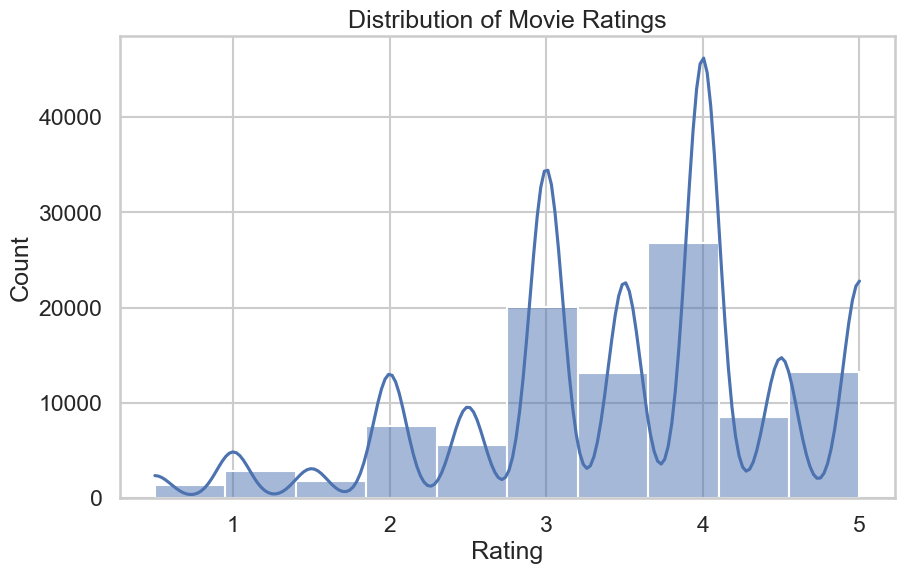

In [22]:
# Rating Distribution

print(ratings_movies["rating"].describe())

sns.histplot(ratings_movies["rating"], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

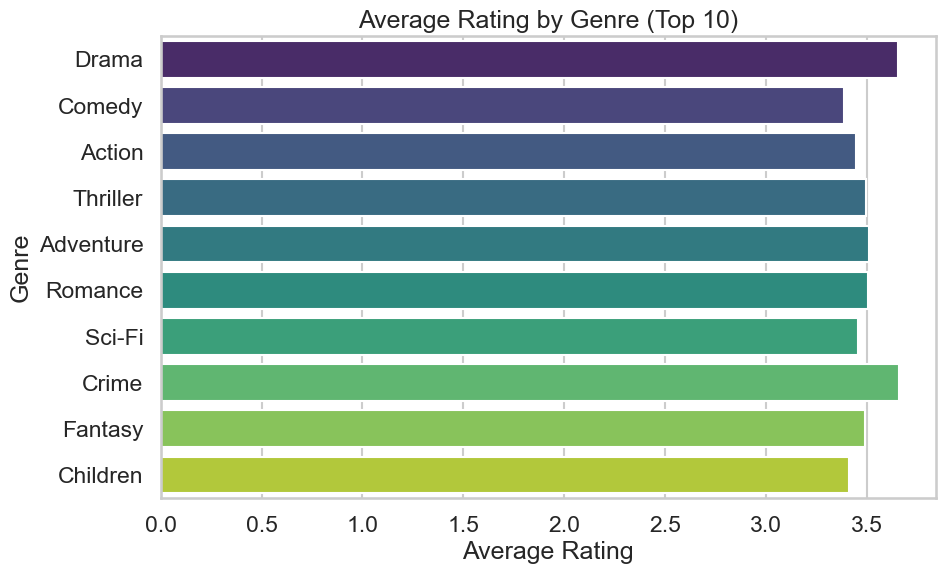

In [23]:
# Explode genres so each movie-genre combination gets a separate row
ratings_exploded = ratings_movies.assign(
    genre=ratings_movies["genres"].str.split('|')
).explode("genre")

# Average rating and number of ratings per genre
genre_stats = ratings_exploded.groupby("genre")["rating"].agg(["mean", "count"]).sort_values("count", ascending=False)

# Select only top 10 genres
top10_genres = genre_stats.head(10)

# Plot average rating per genre (only top 10)
sns.barplot(data=top10_genres, x="mean", y=top10_genres.index, palette="viridis")
plt.title("Average Rating by Genre (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()




In [24]:
# Convert timestamp to datetime and extract year

ratings_movies["rating_ts"] = pd.to_datetime(ratings_movies["timestamp"], unit="s", errors="coerce")
ratings_movies["rating_year"] = ratings_movies["rating_ts"].dt.year

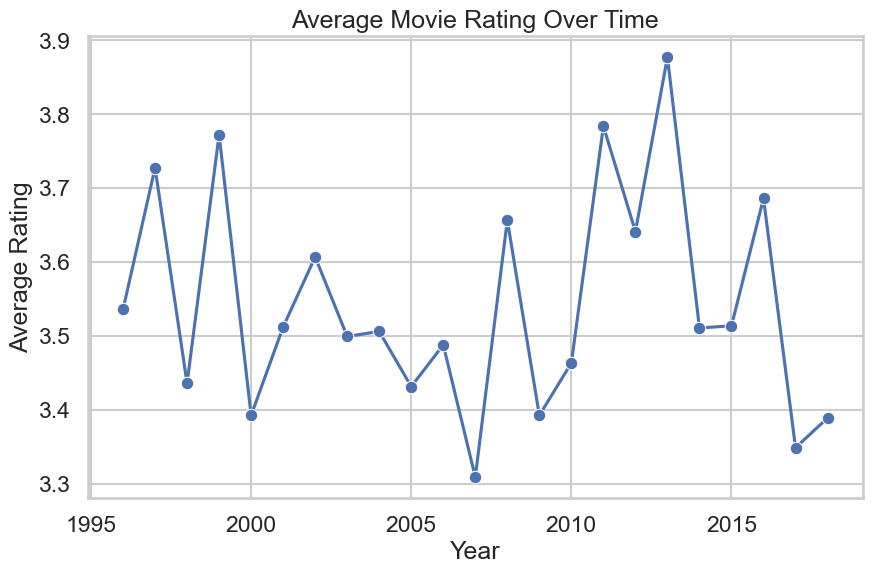

In [25]:
# Average rating per year

yearly_trend = ratings_movies.groupby("rating_year")["rating"].mean().dropna()

sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Average Movie Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

In [26]:
# textual Summary

print("Average rating overall:", round(ratings_movies['rating'].mean(), 2))
print("Most common rating:", ratings_movies['rating'].mode()[0])
print("Top-rated genres:\n", genre_stats.head(5))

Average rating overall: 3.5
Most common rating: 4.0
Top-rated genres:
                mean  count
genre                     
Drama      3.656184  41928
Comedy     3.384721  39053
Action     3.447984  30635
Thriller   3.493706  26452
Adventure  3.508609  24161


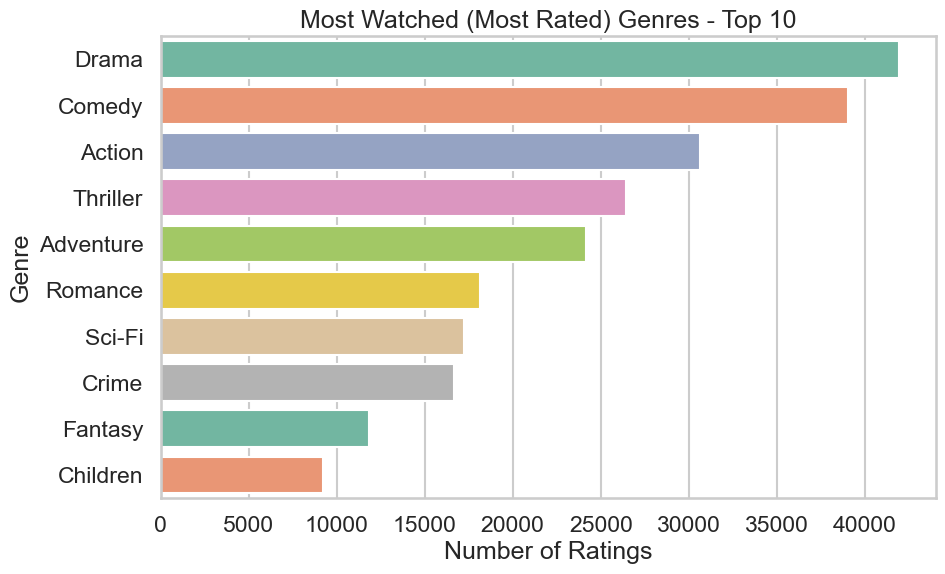

In [27]:
# Split genres and expand rows
ratings_exploded = ratings_movies.assign(
    genre=ratings_movies["genres"].str.split('|')
).explode("genre")

# Count number of ratings per genre
genre_popularity = ratings_exploded["genre"].value_counts().head(10)

# Plot
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette="Set2")
plt.title("Most Watched (Most Rated) Genres - Top 10")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.show()

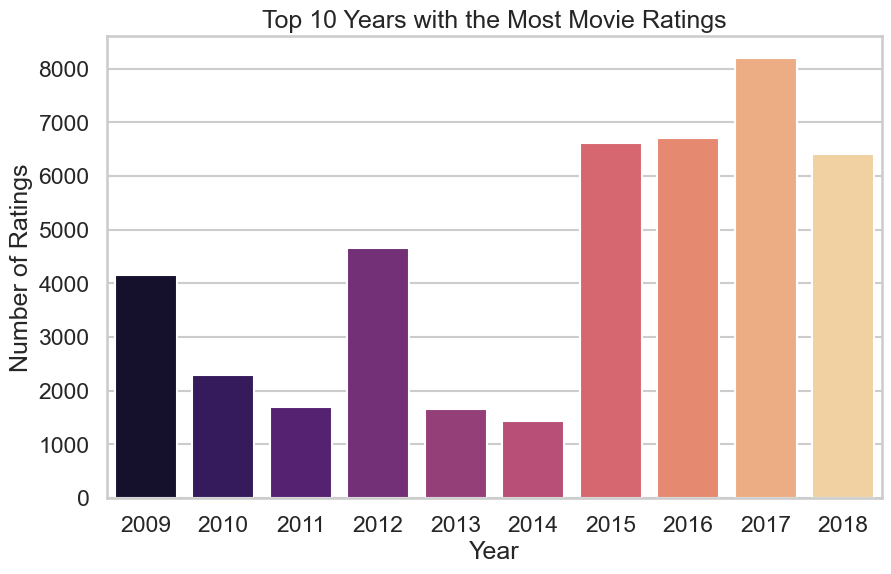

In [28]:
# Count how many ratings were made each year
year_popularity = ratings_movies["rating_year"].value_counts().sort_index().tail(10)

# Plot
sns.barplot(x=year_popularity.index, y=year_popularity.values, palette="magma")
plt.title("Top 10 Years with the Most Movie Ratings")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

In [29]:
# Count number of ratings per genre
genre_popularity = ratings_exploded["genre"].value_counts()

# Get bottom 10 (least watched)
least_watched_genres = genre_popularity.tail(10)

# Display
least_watched_genres

genre
Mystery               7674
Horror                7291
Animation             6988
War                   4859
IMAX                  4145
Musical               4138
Western               1930
Documentary           1219
Film-Noir              870
(no genres listed)      47
Name: count, dtype: int64

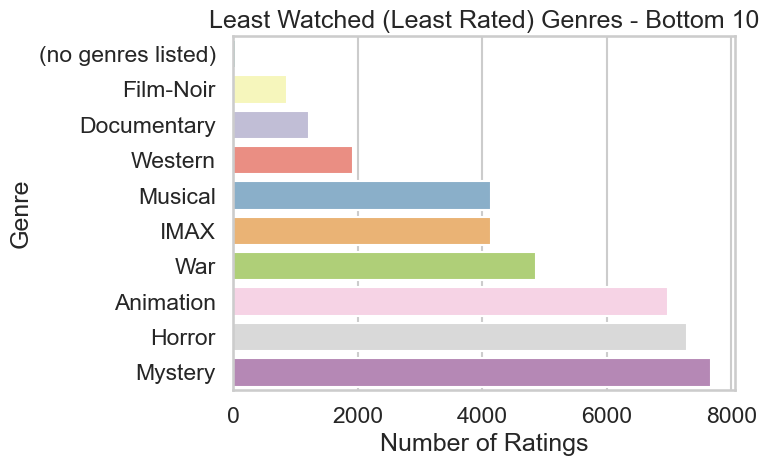

In [30]:
# Sorted barplot (from least to more)
least_sorted = least_watched_genres.sort_values(ascending=True)
plt.figure(figsize=(8,5))
sns.barplot(
    x=least_sorted.values,
    y=least_sorted.index,
    palette="Set3")
plt.title("Least Watched (Least Rated) Genres - Bottom 10")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [31]:
# Merged ratings_movies to get my new sheet
ratings_movies_feat.to_csv("merged_ratings_movies.csv", index=False)